<a href="https://colab.research.google.com/github/abduljabbar2017/project-Tensorflow/blob/main/Chapter_2_Regression_and_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple linear regression**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

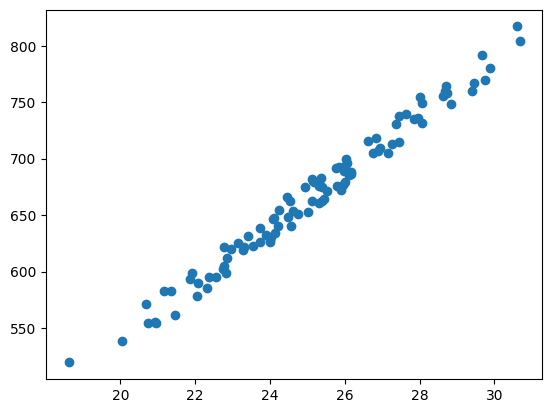

In [2]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [3]:
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are", W,b)

The regression coefficients are 24.815544052284988 43.4989785533412


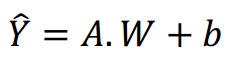

In [4]:
y_pred = W * area + b

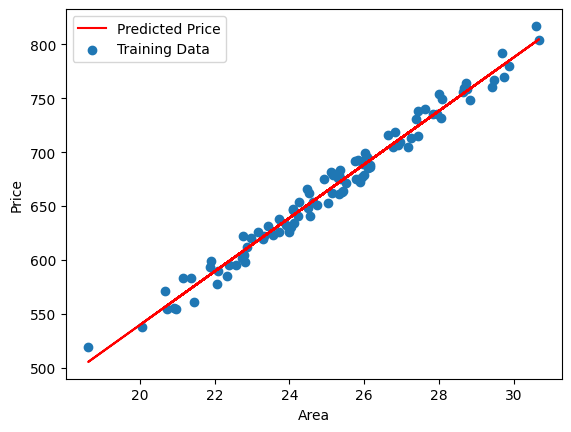

In [5]:
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

# **simple_linear_regression_using_keras_API**

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

In [10]:
data = (data - data.min()) / (data.max() - data.min())  #Normalize

In [11]:
model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [13]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 0.0295 - val_loss: 0.0305
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0264 - val_loss: 0.0269
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0247 - val_loss: 0.0237
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200 - val_loss: 0.0211
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0182 - val_loss: 0.0188
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0101 - val_loss: 0.0103
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - val_l

In [14]:
y_pred = model.predict(data['area'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


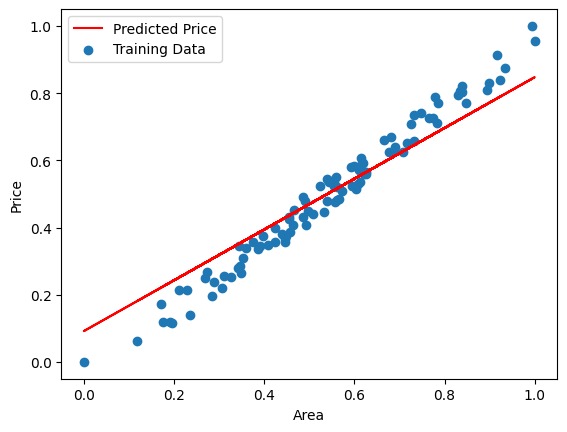

In [15]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [16]:
model.weights

[<KerasVariable shape=(1, 1), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>]